In [1]:
#Придумайте матрицы, которые обладают следующими свойствами:

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import decomposition
from sklearn import metrics


a) Диагональная, ортогональная, но не единичная(!)
диагонали, остальные = 0. 
Ортогональная – это та матрица, которая при умножении на транспонированную будет в результате давать единичную матрицу
Из свойств ортогональной матрицы следует, что определитель равен +-1, а также то, что произведение строки на саму себя равно 1, а на другую строку равно 0 (аналогично для стобцов)
[Киркинский А.С. Линейная алгебра и аналитическая геометрия: Учебное пособие.– М.: Академический Проект, 2006. – 256 с.]
В соответствии с вышесказанным, матрица, которая является одновременно диагональной, ортогональной и не единичной не существует либо принимает различные неявные формы единицы (например, cos(0) или 5/5 или ln(e )


In [27]:
matrix1 = np.diagflat([np.sin(np.pi/2),np.cos(0)])
matrix1

array([[1., 0.],
       [0., 1.]])

b)Верхнетреугольная, ортогональная
Верхнетреугольной называется матрица, у которой есть значения на главной диагонали и выше нее. В соответствии с предыдущими рассуждениями, матрица, которая будет верхнетреугольной и ортогональной будет единичная матрица с неявной формой ноля в первой строке 2 столбца (sin(0), 0/5, ln(1)


In [28]:
matrix2 = np.array([[1,np.log(1)],[0,1]])
matrix2

array([[1., 0.],
       [0., 1.]])

c)Нижнетреугольная, ортогональная
Аналогично предыдущему


In [29]:
matrix3 = np.array([[1,0],[np.sin(0),1]])
matrix3

array([[1., 0.],
       [0., 1.]])

In [30]:
#d) Матрица, у которой определитель = 1, и все элементы не равны 0
matrix4 = np.array([[4,2],[5.5,3]])
np.linalg.det(matrix4)

1.0000000000000004

In [31]:
#Найдите собственные значения и собственные вектора матриц:
m0 = np.array([[2, 2],
              [1, 3]])

In [32]:
w0, v0 = np.linalg.eig(m0)
print(w0,v0)

[1. 4.] [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


In [33]:
#Найдите спектральное разложение матрицы:
#спектральное разложение -- это представление матрицы в виде произведения A = S(T)DS 
#D диагональная из собственных значнеий
#S ортогональная матрица составленная из собственных векторов

In [34]:
m1 = np.array([[1, 2],
              [2,3]])
w1, v1 = np.linalg.eig(m1)

In [35]:
#создаем диагональную D матрицу из собственных значений матрицы m1
D = np.diag(w1)
D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [36]:
#создаем ортогональную S матрицу из собственных значений матрицы m1
S = v1.T
S

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

In [37]:
#проверка
S.T@D@S

array([[1., 2.],
       [2., 3.]])

In [43]:
#Постройте зависимость качества восстановления рукописных цифр (MNIST) 
#в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

In [44]:
digits = datasets.load_digits()

In [61]:
mse = {}
for i in range(60):
    pca = decomposition.PCA(n_components = i)
    digits_reduced = pca.fit_transform(digits.data)
    digits_original = pca.inverse_transform(digits_reduced)
    mse_i = metrics.mean_squared_error(digits.data, digits_original)
    mse.update({i:mse_i})

In [62]:
df = pd.DataFrame.from_dict(mse, orient = 'index')
df.index = df.index+1

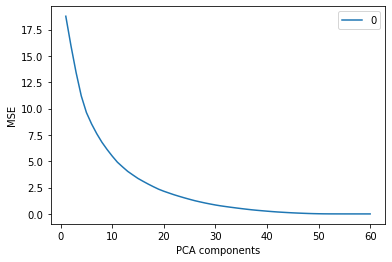

In [64]:
df.plot(ylabel='MSE', xlabel = 'PCA components')
plt.show()